In [87]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Estimación de Pi

In [70]:
def MonteCarloPi(nTiros):
    nAciertos=0
    contador=0
    while contador<=nTiros:
        rd.seed()
        x=rd.uniform(-1,1)
        y=rd.uniform(-1,1)
        r2=x**2+y**2
        if r2<=1:
            nAciertos+=1
        else:
            pass
        contador+=1
    return (nAciertos/nTiros*4,(nAciertos/nTiros*4-np.pi)*100)

In [71]:
MonteCarloPi(10000)

(3.1484, 0.6807346410206971)

# Integración de Monte Carlo

## Unidimensional

In [73]:
def Func1(X):
    return X**2

In [75]:
def MonteCarloIntegration(F,A,N):
    ni=[]
    for iN in range(N):
        np.random.seed(np.random.randint(10**4,10**8))
        ni.append((A[1]-A[0])*np.random.random()+A[0])
    valor=F(np.array(ni)).sum()*(A[1]-A[0])/N
    return (valor,1/np.sqrt(N))

In [76]:
MonteCarloIntegration(Func1,(0,1),10)

(0.384075708499623, 0.31622776601683794)

## Multidimensional

In [77]:
def Func2(X):
    suma=0
    for iX in X:
        suma+=iX
    return suma**2

In [81]:
def MonteCarloIntegrationMultiDimensional(F,A,N,nX):
    ni=[]
    for iX in range(nX):
        nx=[]
        for iN in range(N):
            nx.append((A[1]-A[0])*np.random.random()+A[0])
        ni.append(np.array(nx))
    valor=F(np.array(ni)).sum()*(A[1]-A[0])**nX/N
    return (valor,1/np.sqrt(N))

In [83]:
MonteCarloIntegrationMultiDimensional(Func2,(0,1),1000,10)

(25.79121444713019, 0.03162277660168379)

In [91]:
N=np.arange(1,1000)
error=[]
for iN in N:
    error.append(MonteCarloIntegrationMultiDimensional(Func2,(0,1),iN,10)[1])

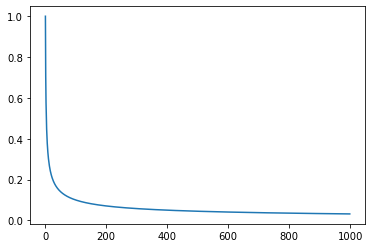

In [92]:
plt.plot(N,error)